# Decision Tree


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [64]:
# import a dataset from sklearn
from sklearn.datasets import load_breast_cancer

In [65]:
print(load_breast_cancer)

<function load_breast_cancer at 0x7fc0856c73a0>


In [66]:
X,y = load_breast_cancer(return_X_y=True)

In [67]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [78]:
clf = DecisionTreeClassifier(random_state=0) # Default criterion is "gini"

# Model building without post-pruning

In [70]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [71]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [72]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [74]:
print(test_accuracy)
print(train_accuracy)

0.8811188811188811
1.0


# Drawing a tree

In [75]:
from sklearn import tree

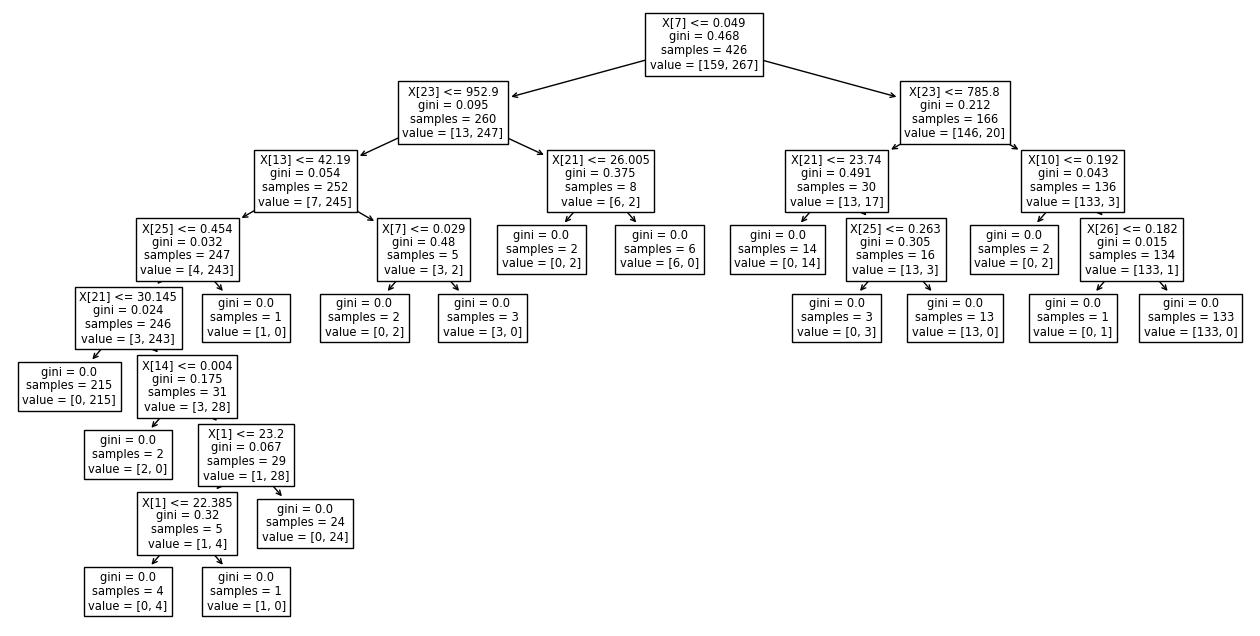

In [76]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf)
plt.show()

# Decision Tree Classifier with criterion = entropy

In [79]:
clf1 = DecisionTreeClassifier(random_state=0, criterion="entropy")

In [80]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [81]:
y_train_pred1 = clf1.predict(X_train)
y_test_pred1 = clf1.predict(X_test)

In [82]:
train_accuracy = accuracy_score(y_train, y_train_pred1)
test_accuracy = accuracy_score(y_test, y_test_pred1)

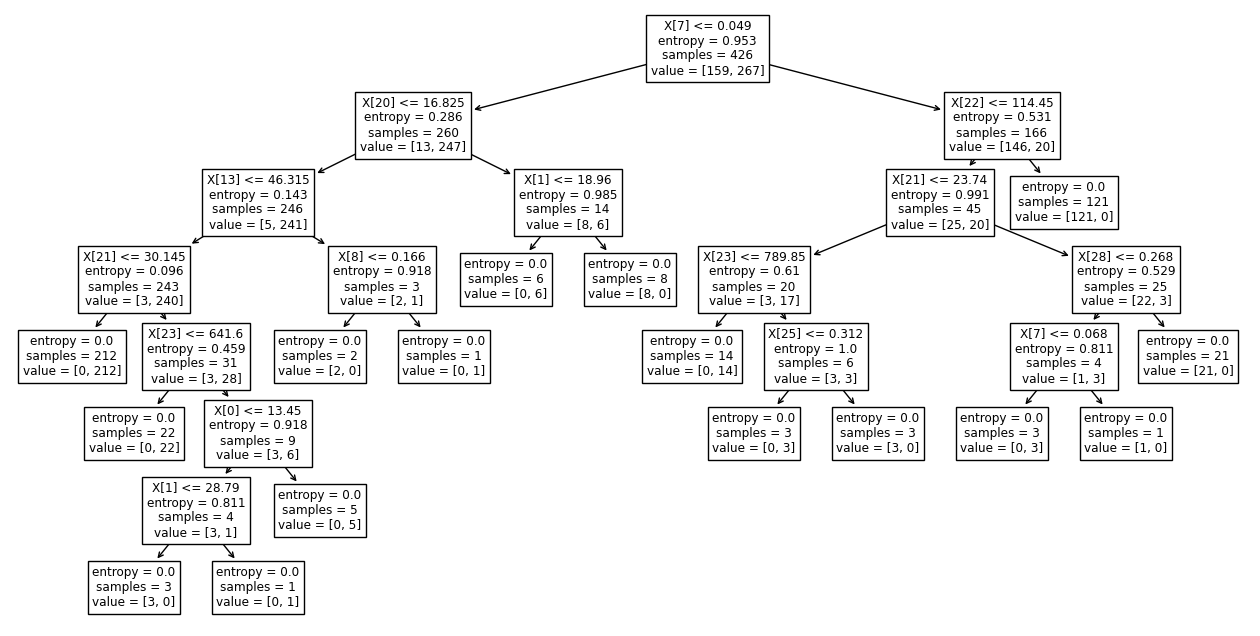

In [83]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf1)
plt.show()

# Pruning Concept

In [39]:
# to understand the pruning concept
# cost complexity parameter
# alpha parameter
# it help us to prun the tree with respect to "weakest link" where the node with smallest effect. We will prun first

In [84]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [41]:
ccp_alpha, impurities = path.ccp_alphas, path.impurities

In [42]:
print(ccp_alpha)
print(impurities)

[0.         0.00646687 0.00761763 0.00761763 0.01178298 0.01397793
 0.01408451 0.01454649 0.02136514 0.02151855 0.02344814 0.03237839
 0.04499435 0.05968877 0.10212482 0.57151476]
[0.         0.00646687 0.01408451 0.02170214 0.03348512 0.04746305
 0.06154756 0.07609405 0.09745919 0.11897774 0.14242588 0.17480427
 0.21979863 0.2794874  0.38161222 0.95312698]


In [44]:
clfs = [] # will store all the impurities here
for ccpa in ccp_alpha:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccpa)
    clf.fit(X_train, y_train)
    clfs.append(clf)



In [45]:
print(clfs)

[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.006466872070806265, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007617634971447257, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007617634971447257, random_state=0), DecisionTreeClassifier(ccp_alpha=0.011782981240971536, random_state=0), DecisionTreeClassifier(ccp_alpha=0.013977929097949163, random_state=0), DecisionTreeClassifier(ccp_alpha=0.014084507042253521, random_state=0), DecisionTreeClassifier(ccp_alpha=0.014546493179173727, random_state=0), DecisionTreeClassifier(ccp_alpha=0.021365135271784304, random_state=0), DecisionTreeClassifier(ccp_alpha=0.021518550181772622, random_state=0), DecisionTreeClassifier(ccp_alpha=0.023448143507858163, random_state=0), DecisionTreeClassifier(ccp_alpha=0.03237838944713503, random_state=0), DecisionTreeClassifier(ccp_alpha=0.04499435438076969, random_state=0), DecisionTreeClassifier(ccp_alpha=0.05968877262458602, random_state=0), DecisionTreeClassifier(ccp

In [46]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

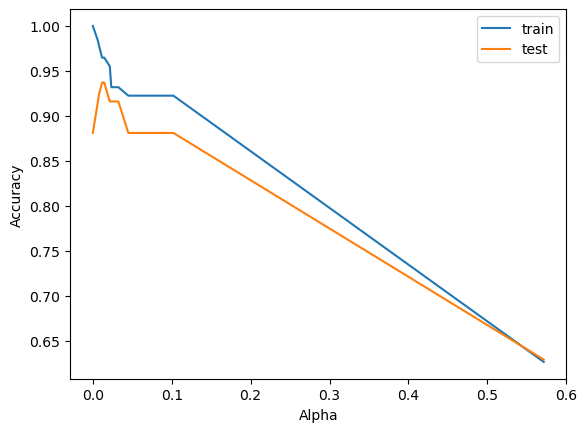

In [85]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.plot(ccp_alpha,train_scores,label="train")
ax.plot(ccp_alpha,test_scores, label = "test")
ax.legend()

In [55]:
clf_final = DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

[Text(0.4, 0.875, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.2, 0.625, 'gini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.6, 0.625, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.4, 0.375, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.6, 0.125, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.8, 0.375, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

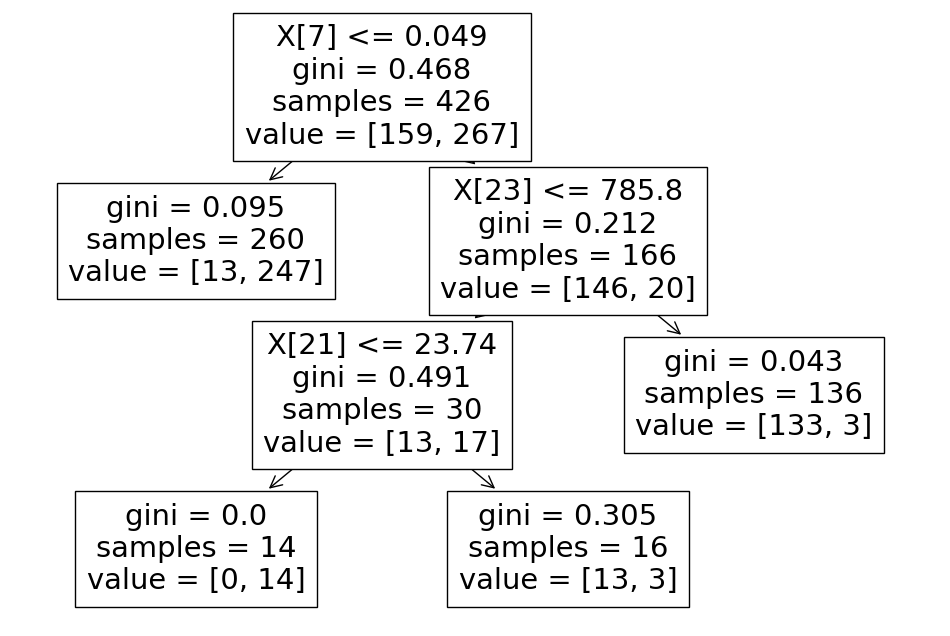

In [56]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_final)

In [57]:
accuracy_score(y_test, clf_final.predict(X_test))

0.916083916083916

In [58]:
accuracy_score(y_train, clf_final.predict(X_train))

0.9553990610328639

# Hyperparameter Tuning

In [ ]:
# hyperparameter tuning
# 1) Grid search CV : It work thoroghly. Much minute level and try all combinations of parameters 
# 2) Randomized search cv : it select random parameter
# in general situation we finf the sma eaccuracy
# Grid search cv metghod is more better but computational time is high

In [86]:
# what is Hyperparameter Tuning ?

# Lets’ take an example of Decision tree. When we build a 
# DT model we don’t have any idea about which criterion 
# (“gini” or “entropy”) ,what min_depth , what min_samples_split 
# etc will give better model so to break this kind of ambiguity 
# we use hyperparameter tuning in which we take a range of value 
# for each parameters and whichever parameteric value will be best 
# we will feed that particular value into DecisionTreeClassifier() .

In [88]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [89]:
param_grid={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1),
             }

In [90]:
dt1=DecisionTreeClassifier(random_state=0)

In [91]:
random_cv = RandomizedSearchCV(dt1,param_grid,n_iter=100, cv=3,  n_jobs=-1)

In [92]:
%%time

#random_cv.fit(x,y)
random_cv.fit(X_train,y_train)

print("Best params:\n")
print(random_cv.best_params_)

Best params:

{'splitter': 'random', 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_depth': 47, 'criterion': 'entropy'}
CPU times: user 225 ms, sys: 195 ms, total: 420 ms
Wall time: 4.04 s


In [93]:
random_cv.best_score_

0.9389671361502346

In [94]:
random_cv.score(X_train, y_train)

0.9694835680751174

In [95]:
random_cv.score(X_test, y_test)

0.965034965034965

In [96]:
# Checking the accuracy score of test dataset aftewr pruning

In [97]:
dt1_final = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=8, min_samples_leaf=5,min_samples_split=5,splitter='random')

In [98]:
dt1_final.fit(X_train, y_train)
y_pred = dt1_final.predict(X_test)
accuracy_score(y_test, y_pred)

0.958041958041958

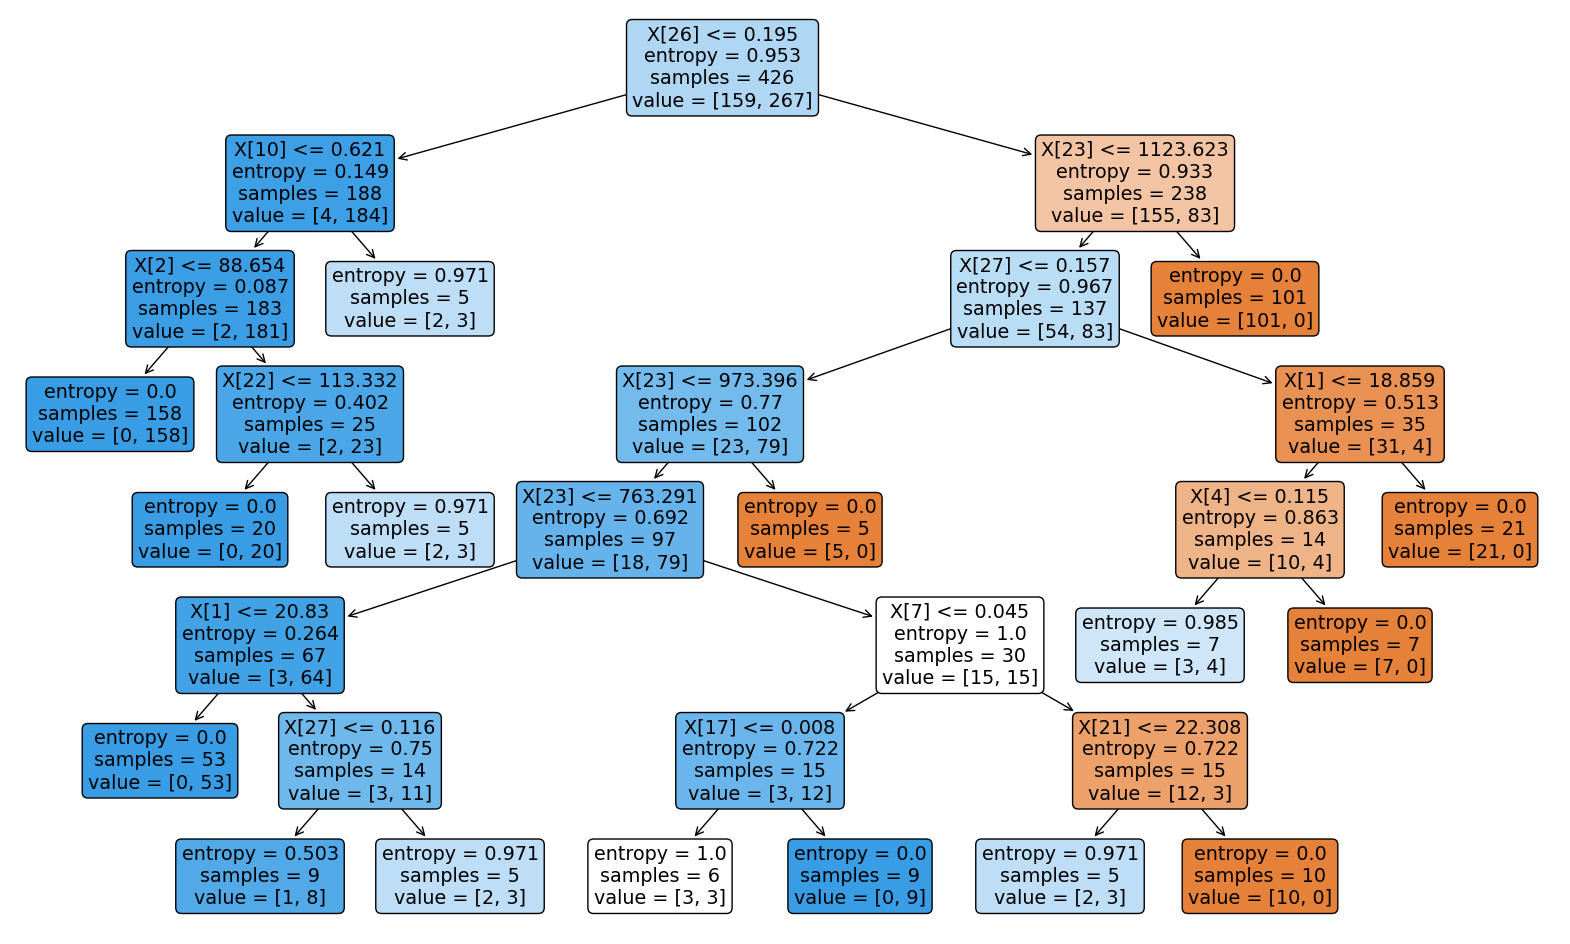

In [99]:
plt.figure(figsize=(20,12))
tree.plot_tree(dt1_final, rounded=True, filled=True)
plt.show()


# GridsearchCV

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1),
             }

In [102]:
dt2 = DecisionTreeClassifier(random_state=0)

In [104]:
grid_cv = GridSearchCV(dt2,param_grid, cv=3,  n_jobs=-1)

In [105]:
%%time

grid_cv.fit(X_train, y_train)
print("Best params:\n")
print(random_cv.best_params_)

Best params:

{'splitter': 'random', 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_depth': 47, 'criterion': 'entropy'}
CPU times: user 38.9 s, sys: 954 ms, total: 39.9 s
Wall time: 55.2 s


In [106]:
grid_cv.best_score_

0.9460093896713615

In [107]:
grid_cv.score(X_train, y_train)

0.9647887323943662

In [108]:
grid_cv.score(X_test, y_test)

0.958041958041958